In [225]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Загрузим и просмотрим интересующий нас датасет

In [226]:
df = pd.read_csv("train.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Очистим наш датасет от колонок, в которых больше 10% данных пустые

In [227]:
count_values = df.Id.count()
count_null = df.isnull().sum()
filter_null = count_null[count_null/count_values>0.1].index
df = df.drop(columns=filter_null)
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch'

Соберем оставшиеся колонки, имеющие пустые значения, в список

In [228]:
count_null = df.isnull().sum()
filter_null = count_null[count_null>0].index
filter_null

Index(['MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Electrical', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond'],
      dtype='object')

Определим к какому типу данных относятся колонки, с пустыми значениями

In [229]:
df_1 = df[filter_null]
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MasVnrArea    1452 non-null   float64
 1   BsmtQual      1423 non-null   object 
 2   BsmtCond      1423 non-null   object 
 3   BsmtExposure  1422 non-null   object 
 4   BsmtFinType1  1423 non-null   object 
 5   BsmtFinType2  1422 non-null   object 
 6   Electrical    1459 non-null   object 
 7   GarageType    1379 non-null   object 
 8   GarageYrBlt   1379 non-null   float64
 9   GarageFinish  1379 non-null   object 
 10  GarageQual    1379 non-null   object 
 11  GarageCond    1379 non-null   object 
dtypes: float64(2), object(10)
memory usage: 137.0+ KB


Заполним пустые значения медианным для числовых столбов и часто встречающемся значением для строковых столбцов

In [230]:
for i in filter_null:
    if df[i].dtype=='O':
        most_frequent_values = df[i].mode().iloc[0]
        df[i] = df[i].fillna(most_frequent_values)
    elif df[i].dtype=='float64':
        median_values = df[i].median()
        df[i] = df[i].fillna(median_values)
        df[i] = df[i].astype('int64')


Проверим заполненность столбцов

In [231]:
df_1 = df[filter_null]
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MasVnrArea    1460 non-null   int64 
 1   BsmtQual      1460 non-null   object
 2   BsmtCond      1460 non-null   object
 3   BsmtExposure  1460 non-null   object
 4   BsmtFinType1  1460 non-null   object
 5   BsmtFinType2  1460 non-null   object
 6   Electrical    1460 non-null   object
 7   GarageType    1460 non-null   object
 8   GarageYrBlt   1460 non-null   int64 
 9   GarageFinish  1460 non-null   object
 10  GarageQual    1460 non-null   object
 11  GarageCond    1460 non-null   object
dtypes: int64(2), object(10)
memory usage: 137.0+ KB


In [232]:
count_null = df.isnull().sum()
filter_null = count_null[count_null>0].index
filter_null

Index([], dtype='object')

Удалим дубликаты строк

In [233]:
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotArea        1460 non-null   int64 
 4   Street         1460 non-null   object
 5   LotShape       1460 non-null   object
 6   LandContour    1460 non-null   object
 7   Utilities      1460 non-null   object
 8   LotConfig      1460 non-null   object
 9   LandSlope      1460 non-null   object
 10  Neighborhood   1460 non-null   object
 11  Condition1     1460 non-null   object
 12  Condition2     1460 non-null   object
 13  BldgType       1460 non-null   object
 14  HouseStyle     1460 non-null   object
 15  OverallQual    1460 non-null   int64 
 16  OverallCond    1460 non-null   int64 
 17  YearBuilt      1460 non-null   int64 
 18  YearRemodAdd   1460 non-null

Запишем строковые столбцы в новый датафрейм и создадим соответсвующий csv файл, который можно проанализировать в расширении excel view на соответсвие типу данных

In [234]:
cloumns_object = df.select_dtypes(include='object').columns
df[cloumns_object].to_csv("columns_object.csv")

In [235]:
df.to_csv("new_dataset.csv",index=False)

In [236]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats



Проведите разведочный анализ данных (EDA) для трех интересующих нас столбцов 'SalePrice', 'OverallQual', 'GrLivArea'

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


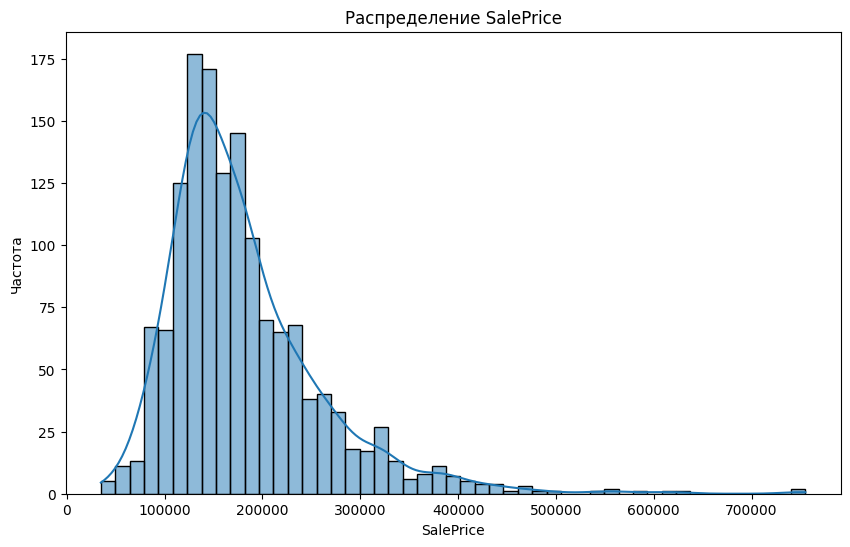

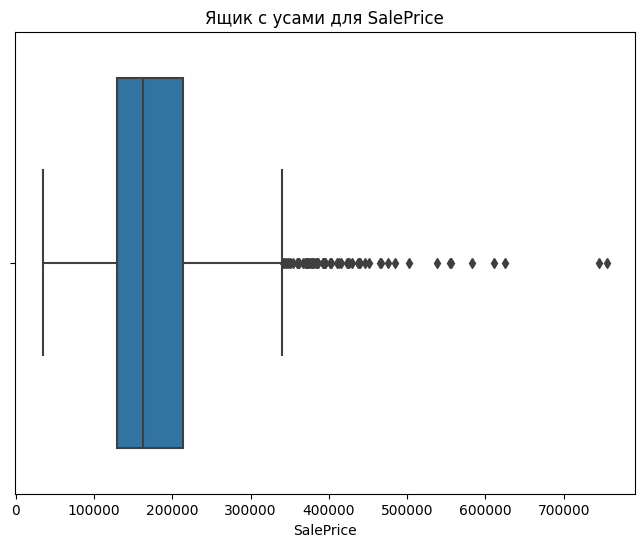

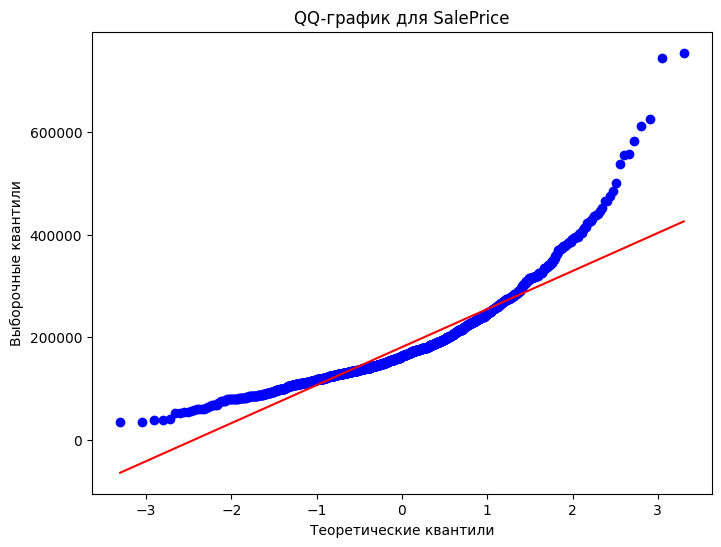

In [237]:
# Описательная статистика
print(df['SalePrice'].describe())

# Гистограмма
plt.figure(figsize=(10, 6))
sns.histplot(df['SalePrice'], kde=True)
plt.title('Распределение SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Частота')
plt.show()

# Ящик с усами
plt.figure(figsize=(8, 6))
sns.boxplot(x='SalePrice', data=df)
plt.title('Ящик с усами для SalePrice')
plt.xlabel('SalePrice')
plt.show()

# QQ-график
plt.figure(figsize=(8, 6))
stats.probplot(df['SalePrice'], dist="norm", plot=plt)
plt.title('QQ-график для SalePrice')
plt.xlabel('Теоретические квантили')
plt.ylabel('Выборочные квантили')
plt.show()

Заменяем выбросы на ближайшие (в пределах двух стандартных отклонений) значения

In [248]:
# Вычисление среднего и стандартного отклонения
mean_price = df['SalePrice'].mean()
std_price = df['SalePrice'].std()

# Определение верхней и нижней границы для выбросов
lower_bound = mean_price - 2 * std_price
upper_bound = mean_price + 2* std_price

# Замена выбросов на значения в пределах границ
df['SalePrice'] = np.where(df['SalePrice'] < lower_bound, lower_bound, df['SalePrice'])
df['SalePrice'] = np.where(df['SalePrice'] > upper_bound, upper_bound, df['SalePrice'])

count      1460.000000
mean     176365.190009
std       64955.928425
min       37027.357716
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      320417.712317
Name: SalePrice, dtype: float64


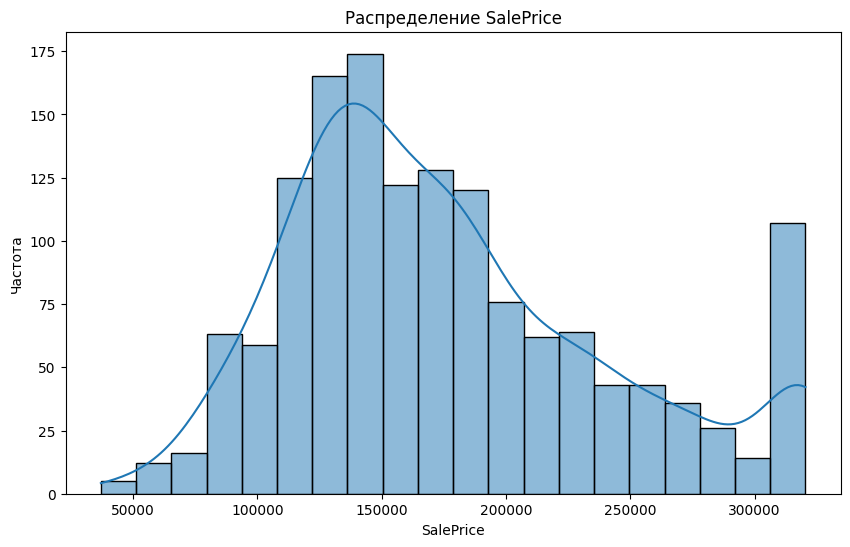

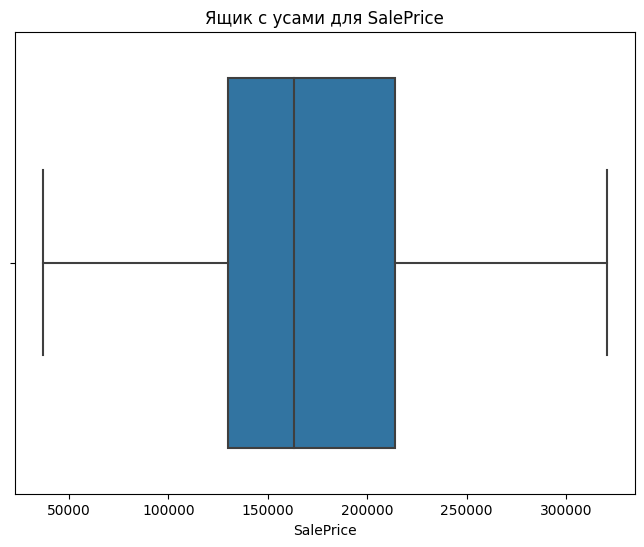

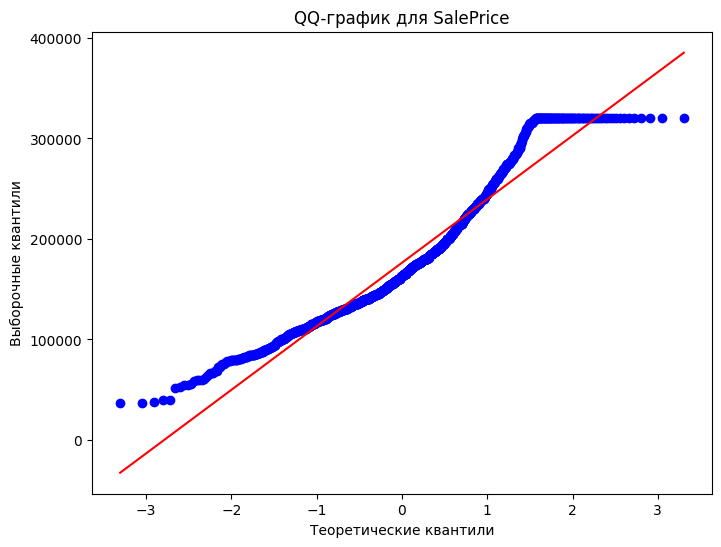

In [249]:
# Описательная статистика
print(df['SalePrice'].describe())

# Гистограмма
plt.figure(figsize=(10, 6))
sns.histplot(df['SalePrice'], kde=True)
plt.title('Распределение SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Частота')
plt.show()

# Ящик с усами
plt.figure(figsize=(8, 6))
sns.boxplot(x='SalePrice', data=df)
plt.title('Ящик с усами для SalePrice')
plt.xlabel('SalePrice')
plt.show()

# QQ-график
plt.figure(figsize=(8, 6))
stats.probplot(df['SalePrice'], dist="norm", plot=plt)
plt.title('QQ-график для SalePrice')
plt.xlabel('Теоретические квантили')
plt.ylabel('Выборочные квантили')
plt.show()

count    1460.000000
mean        6.099315
std         1.382997
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64


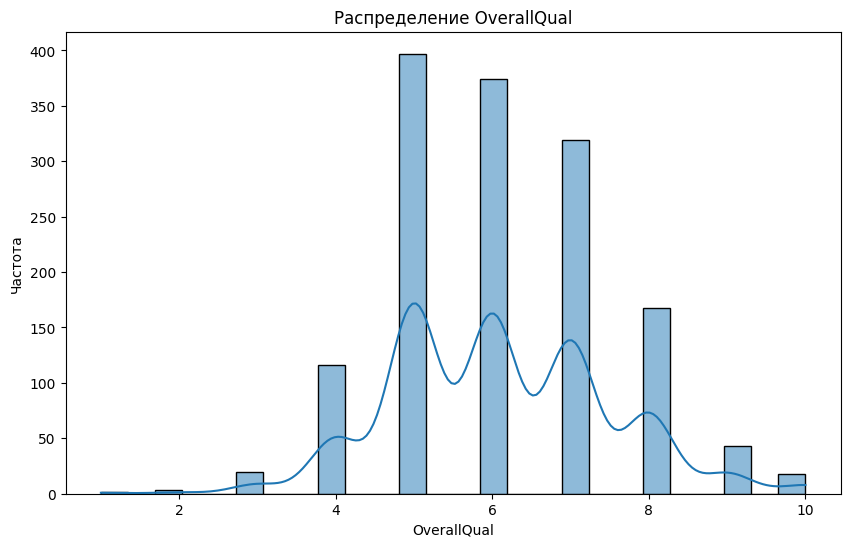

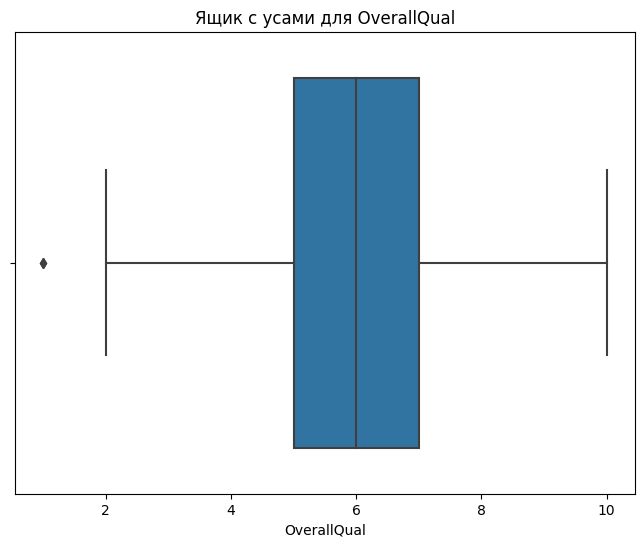

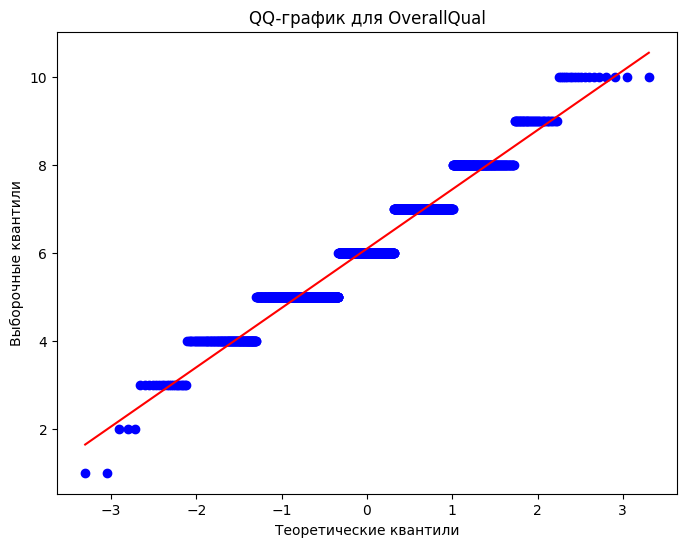

In [240]:
# Описательная статистика
print(df['OverallQual'].describe())

# Гистограмма
plt.figure(figsize=(10, 6))
sns.histplot(df['OverallQual'], kde=True)
plt.title('Распределение OverallQual')
plt.xlabel('OverallQual')
plt.ylabel('Частота')
plt.show()

# Ящик с усами
plt.figure(figsize=(8, 6))
sns.boxplot(x='OverallQual', data=df)
plt.title('Ящик с усами для OverallQual')
plt.xlabel('OverallQual')
plt.show()

# QQ-график
plt.figure(figsize=(8, 6))
stats.probplot(df['OverallQual'], dist="norm", plot=plt)
plt.title('QQ-график для OverallQual')
plt.xlabel('Теоретические квантили')
plt.ylabel('Выборочные квантили')
plt.show()

count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64


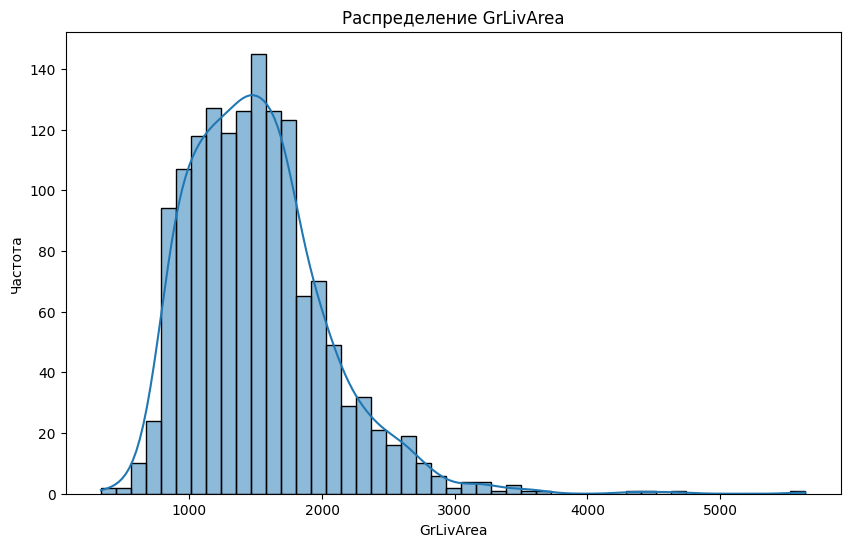

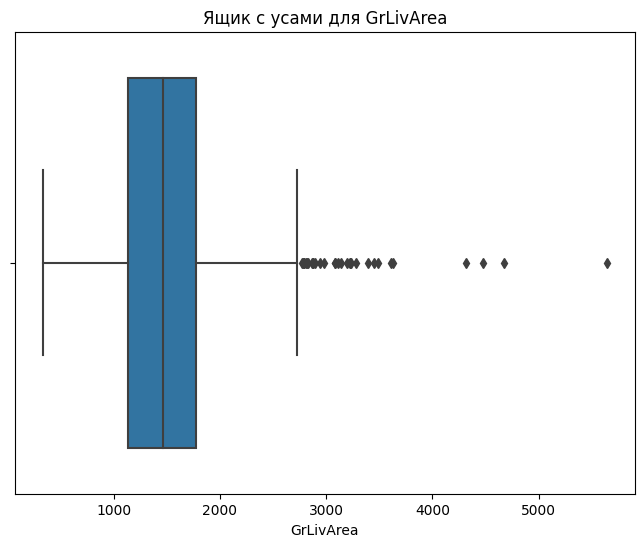

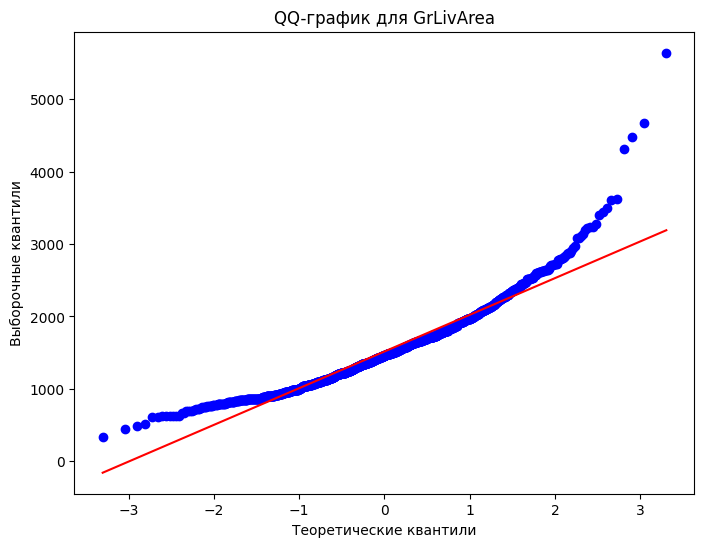

In [241]:
# Описательная статистика
print(df['GrLivArea'].describe())

# Гистограмма
plt.figure(figsize=(10, 6))
sns.histplot(df['GrLivArea'], kde=True)
plt.title('Распределение GrLivArea')
plt.xlabel('GrLivArea')
plt.ylabel('Частота')
plt.show()

# Ящик с усами
plt.figure(figsize=(8, 6))
sns.boxplot(x='GrLivArea', data=df)
plt.title('Ящик с усами для GrLivArea')
plt.xlabel('GrLivArea')
plt.show()

# QQ-график
plt.figure(figsize=(8, 6))
stats.probplot(df['GrLivArea'], dist="norm", plot=plt)
plt.title('QQ-график для GrLivArea')
plt.xlabel('Теоретические квантили')
plt.ylabel('Выборочные квантили')
plt.show()

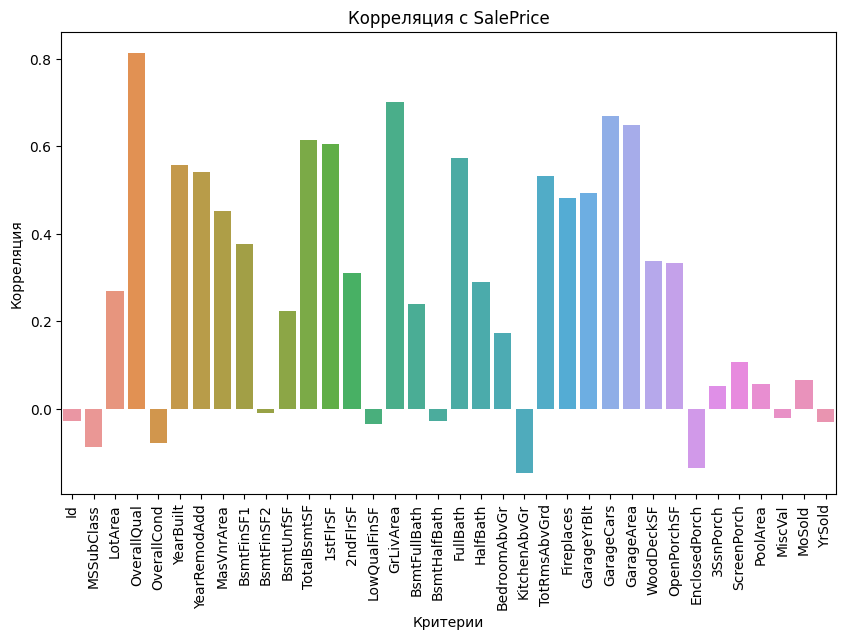

In [242]:
# Выберим только числовые столбцы, включая «Saleprice»
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Вычислим матрицу корреляции
correlation_matrix = numeric_df.corr()

# Выберим значения корреляции, связанные с «SALEPRICE»
saleprice_corr = correlation_matrix['SalePrice'].drop('SalePrice')

# Визуализируем корреляции с «SALEPRICE», используя график
plt.figure(figsize=(10, 6))
sns.barplot(x=saleprice_corr.index, y=saleprice_corr.values)
plt.title("Корреляция с SalePrice")
plt.xlabel("Критерии")
plt.ylabel("Корреляция")
plt.xticks(rotation=90)
plt.show()


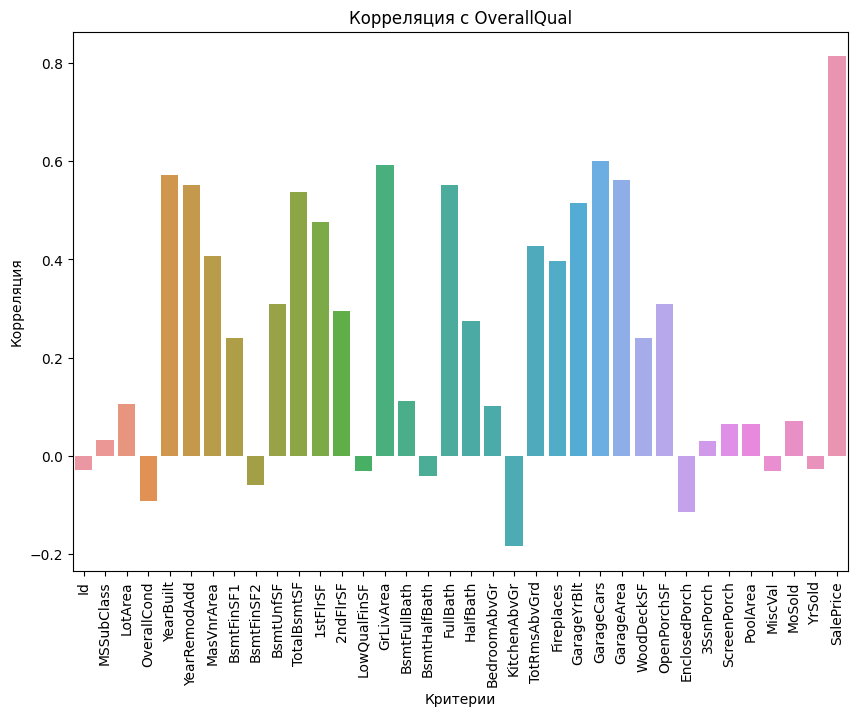

In [243]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Вычислить матрицу корреляции
correlation_matrix = numeric_df.corr()

overallqual_corr = correlation_matrix['OverallQual'].drop('OverallQual')

plt.figure(figsize=(10, 7))
sns.barplot(x=overallqual_corr.index, y=overallqual_corr.values)
plt.title("Корреляция с OverallQual")
plt.xlabel("Критерии")
plt.ylabel("Корреляция")
plt.xticks(rotation=90)
plt.show()


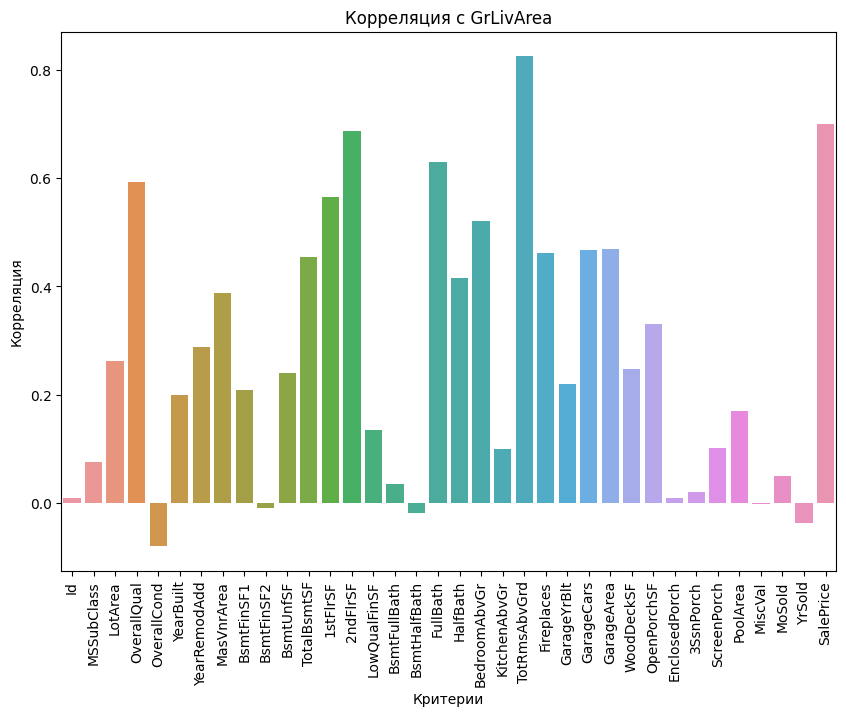

In [244]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
# Вычислить матрицу корреляции
correlation_matrix = numeric_df.corr()

grlivarea_corr = correlation_matrix['GrLivArea'].drop('GrLivArea')

plt.figure(figsize=(10, 7))
sns.barplot(x=grlivarea_corr.index, y=grlivarea_corr.values)
plt.title("Корреляция с GrLivArea")
plt.xlabel("Критерии")
plt.ylabel("Корреляция")
plt.xticks(rotation=90)
plt.show()


Создадим матрицу для всех неповторяющихся комбинаций признаков(колонок) с указанием их коэффициента корреляции, оставим только те, которые имеют сильную зависимость (больше или равной 0,8), в дальнейшем с ними можно будет работать

In [245]:
df_corr = df.drop(columns="Id")
df_encoded = pd.get_dummies(df_corr)
correlation_matrix = df_encoded.corr(method='pearson').stack().reset_index()
correlation_matrix.columns = ['Feature 1', 'Feature 2', 'Correlation']
correlation_matrix = correlation_matrix[(abs(correlation_matrix['Correlation']) >= 0.8) & (correlation_matrix['Feature 1'] != correlation_matrix['Feature 2'])]
correlation_matrix

,Feature 1,Feature 2,Correlation
103,MSSubClass,BldgType_1Fam,-0.817461
567,OverallQual,SalePrice,0.813814
2671,TotalBsmtSF,1stFlrSF,0.819530
2936,1stFlrSF,TotalBsmtSF,0.819530
3305,2ndFlrSF,HouseStyle_2Story,0.809150
...,...,...,...
65946,GarageCond_TA,GarageCond_Fa,-0.807487
66218,PavedDrive_N,PavedDrive_Y,-0.856491
66748,PavedDrive_Y,PavedDrive_N,-0.856491
68627,SaleType_New,SaleCondition_Partial,0.986819


Так же можем создать сводные датафреймы для анализа числовых показателей объекта от категориальных показателей, используя среднее и медианное значение для каждой из групп интересующего столбца.
Ниже приведенный скрипт можно прогнать через цикл For  применив его ко всем 37 столбцам, т.к. это большой объем информации для анализа, оставим только первый для примера)))

In [246]:
object_df = df.select_dtypes(include=['object']).columns
mean_prices = df.groupby(object_df[0] )[['SalePrice','OverallQual', 'GrLivArea', 'GarageCars']].mean()
mean_prices

,SalePrice,OverallQual,GrLivArea,GarageCars
MSZoning,,,,
C (all),74528.000000,3.900000,1191.400000,1.300000
FV,214014.061538,7.200000,1574.538462,2.123077
RH,131558.375000,5.250000,1510.125000,1.125000
RL,188310.294716,6.190269,1551.645526,1.834926
RM,125819.375716,5.454128,1322.073394,1.371560


In [247]:
object_df = df.select_dtypes(include=['object']).columns
median_prices = df.groupby(object_df[0])[['SalePrice','OverallQual', 'GrLivArea', 'GarageCars']].median()
median_prices

,SalePrice,OverallQual,GrLivArea,GarageCars
MSZoning,,,,
C (all),74700.0,4.0,1153.0,1.0
FV,205950.0,7.0,1512.0,2.0
RH,136500.0,5.0,1425.5,1.0
RL,174000.0,6.0,1498.0,2.0
RM,120500.0,5.0,1224.0,1.0
